In [3]:
import numpy as np
import pandas as pd

In [4]:
shop = pd.read_csv('shopping_trends_updated.csv')

In [5]:
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
shop.shape

(3900, 18)

In [7]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [9]:
shop.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [10]:
shop_dup = shop[shop.duplicated()]
shop_dup

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


In [11]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
shop.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [13]:
shop.describe(include='object')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


**Descriptive Analysis**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [15]:
shop['Age_category'] = pd.cut(shop['Age'], bins = [0,15,18,30,50,70], labels = ['child', 'teen', 'Young Adults', 'Middle Age Adults', 'old'])
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,old
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Young Adults
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle Age Adults
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adults
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle Age Adults


In [16]:
fig = px.histogram(shop, y = 'Age', x = 'Age_category')
fig.show()

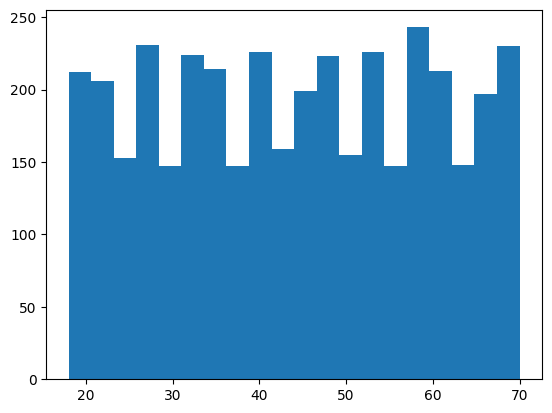

In [17]:
plt.hist(shop['Age'], bins = 20)
plt.show()

<Axes: xlabel='Gender'>

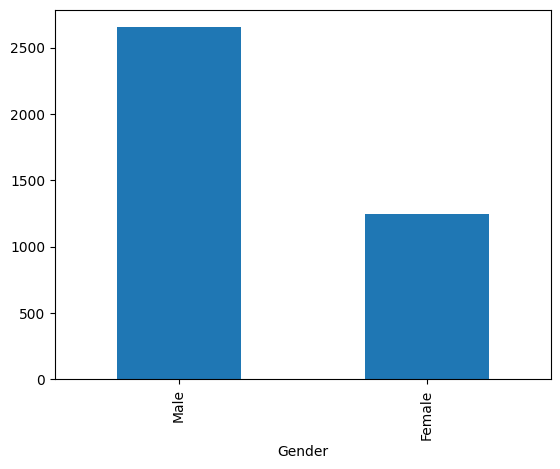

In [18]:
shop['Gender'].value_counts().plot(kind = 'bar')

Text(0.5, 0, 'Gender')

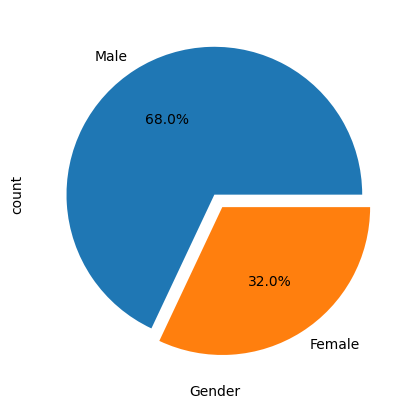

In [19]:
shop["Gender"].value_counts().plot(kind = 'pie', explode=(0,0.1), autopct= "%1.1f%%")
plt.xlabel("Gender")

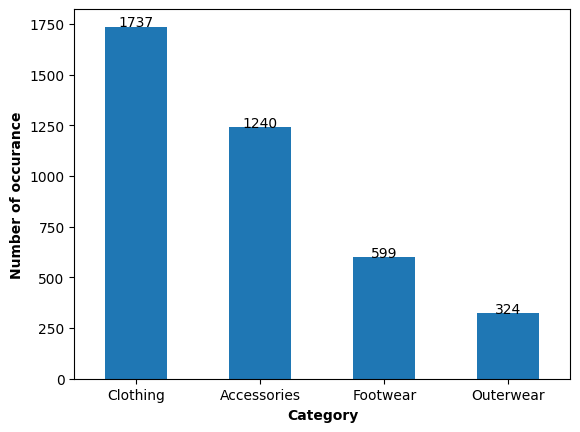

In [20]:
ax = shop['Category'].value_counts().plot(kind = 'bar', rot=0)
for p in ax.patches:
  ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +1), ha = 'center')
plt.xlabel("Category", weight = 'bold')
plt.ylabel("Number of occurance", weight = 'bold')
plt.show()

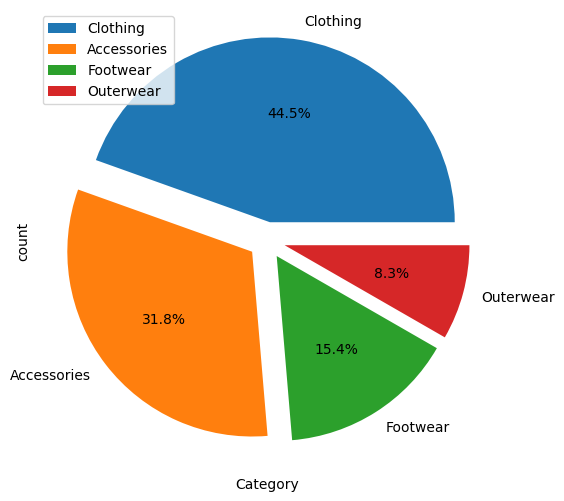

In [21]:
plt.figure(figsize=(20,6))
data = shop['Category'].value_counts()
explode = [0.1]*len(data)
data.plot(kind="pie", explode= explode, autopct= "%1.1f%%")
plt.xlabel('Category')
plt.legend()
plt.show()

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

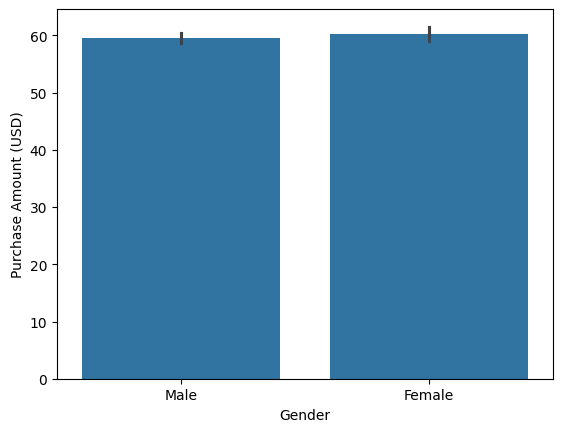

In [22]:
sns.barplot(shop, x=  "Gender", y = "Purchase Amount (USD)")

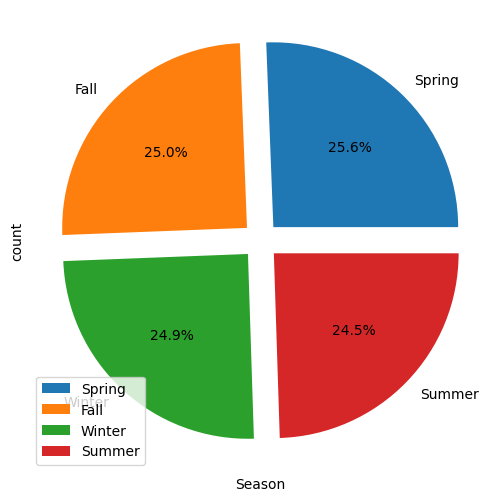

In [23]:
plt.figure(figsize=(20,6))
data = shop['Season'].value_counts()
explode = [0.1]*len(data)
data.plot(kind="pie", explode= explode, autopct= "%1.1f%%")
plt.xlabel('Season')
plt.legend()
plt.show()

<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

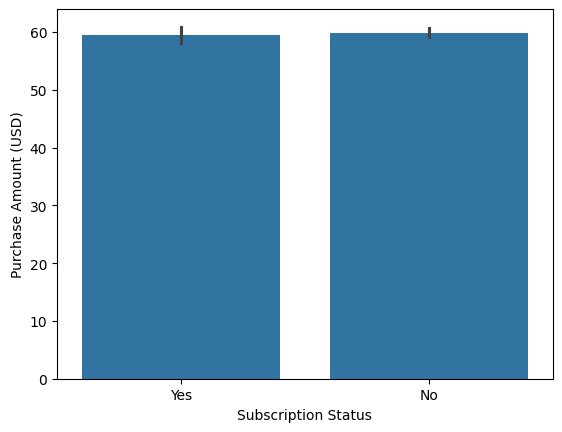

In [24]:
sns.barplot(shop, x = "Subscription Status", y = "Purchase Amount (USD)")

8. Which payment method is the most popular among customers?

<Axes: xlabel='Payment Method'>

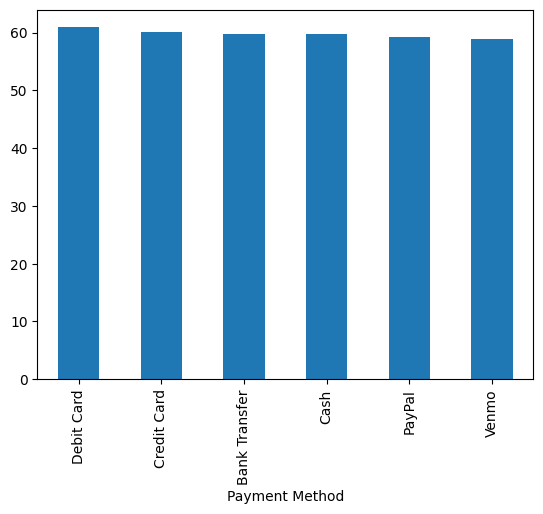

In [25]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending=False).plot(kind='bar')

In [26]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [27]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   int64   
 1   Age                     3900 non-null   int64   
 2   Gender                  3900 non-null   object  
 3   Item Purchased          3900 non-null   object  
 4   Category                3900 non-null   object  
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   object  
 7   Size                    3900 non-null   object  
 8   Color                   3900 non-null   object  
 9   Season                  3900 non-null   object  
 10  Review Rating           3900 non-null   float64 
 11  Subscription Status     3900 non-null   object  
 12  Shipping Type           3900 non-null   object  
 13  Discount Applied        3900 non-null   object  
 14  Promo Code Used         

In [28]:
num_fea = shop[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']]
num_fea.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,55,53,3.1,14
1,19,64,3.1,2
2,50,73,3.1,23
3,21,90,3.5,49
4,45,49,2.7,31


To get Corelation Matrix

In [29]:
cor_mat = num_fea.corr()
cor_mat

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Age,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063
Review Rating,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,0.040445,0.008063,0.004229,1.000000


1 means they have corelation

<Axes: >

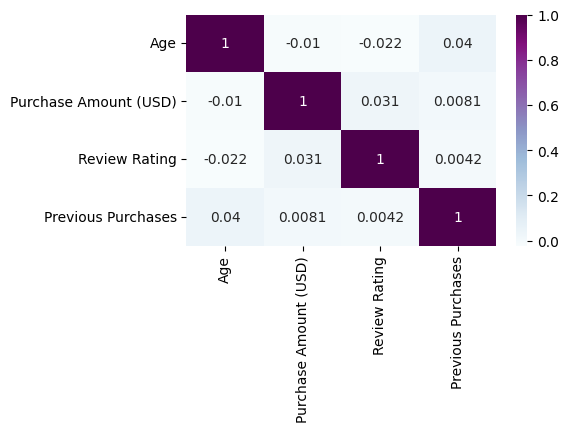

In [30]:
plt.figure(figsize=(5,3))
sns.heatmap(cor_mat, annot=True, cmap='BuPu')